# Training models

Generate some linear-looking data to test linear regression and find minimum theta using normal equations

In [2]:
import numpy as np 
X = 2*np.random.rand(100,1)
y = 4 + 3*X + np.random.rand(100,1)

In [3]:
X_b = np.c_[np.ones((100, 1)), X] # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y) #(X^T.X)^-1 . X^T . y
theta_best

array([[4.46817612],
       [3.05076349]])

In [4]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 4.46817612],
       [10.56970311]])

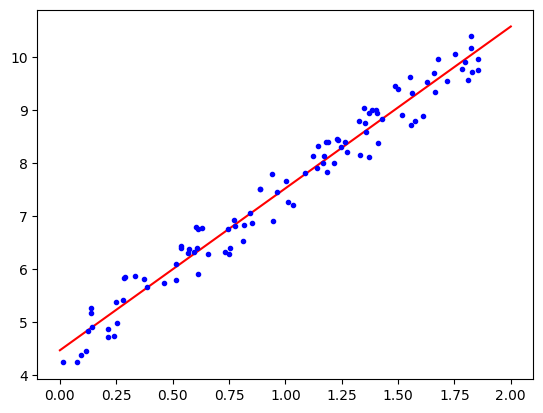

In [5]:
import matplotlib.pyplot as plt
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")

# Linear Regression

In [7]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.46817612]), array([[3.05076349]]))

In [8]:
lin_reg.predict(X_new)

array([[ 4.46817612],
       [10.56970311]])

Both the Normal Equation and the SVD approach get very slow when the number of features grows large. 
Also, once you have trained your Linear Regression model (using the Normal Equation or any other algorithm), predictions are very fast.


# Gradient Descent

The general idea of Gradient Descent is to tweak parameters iteratively in order to minimize a cost function.

When using Gradient Descent, you should ensure that all features have a similar scale (e.g., using Scikit-Learn’s StandardScaler class), or else it will take much longer to converge.

In [14]:
alpha = 0.1 # learning rate
n_iterations = 1000
m = 100

theta = np.random.randn(2,1) # random initialization

for iteration in range(n_iterations):
    gradient = 2/m * X_b.T.dot(X_b.dot(theta) - y) # 2/m sum((X^T.theta - y)X)
    theta = theta - alpha*gradient
theta


array([[4.46817612],
       [3.05076349]])

In [22]:
#This code implements Stochastic Gradient Descent using a simple learning schedule

n_epochs = 50
t0 , t1 = 5, 50

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index : random_index+1] #taking random examples from traning set
        yi = y[random_index : random_index + 1]

        gradient = 2/m * xi.T.dot(xi.dot(theta) - yi) # 2/m sum((X^T.theta - y)X)
        alpha = learning_schedule(epoch * m + i) # decreasing the learning rate continuously
        theta = theta - alpha * gradient


In [23]:
theta

array([[3.12657531],
       [2.23517485]])

By convention we iterate by rounds of m iterations; each round is called an epoch. While the Batch Gradient Descent code iterated 1,000 times through the whole training set, this code goes through the training set only 50 times and reaches a fairly good solution:

In [26]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())
sgd_reg.intercept_, sgd_reg.coef_

(array([4.44128255]), array([3.07124151]))

## Mini batch gradient descent

Mini-batch GD computes the gradients on small random sets of instances called mini-batches. The main advantage of Mini-batch GD over Stochastic GD is that you canget a performance boost from hardware optimization of matrix operations, especially when using GPUs.

Let’s compare the algorithms we’ve discussed so far for Linear Regression (recall that m is the number of training instances and n is the number of features)

| Algorithm | large m | out-of-core support | large n | Hyperparams | Scaling required | scikit-learn |
| --------- | ------- | ------------------- | ------- | ----------- | ---------------- | ------------ |
| Normal Equation | Fast| No | Slow | 0 | No | N/a |
| SVD | Fast | No | Slow | 0 | No | LinearRegression |
| Batch GD | Slow | No | Fast | 2 | Yes | SGDRegressor |
| Stochastic GD | Fast | yes | Fast | >= 2 | Yes | SGDRegressor |
| Mini GD | Fast | yes | Fast | >= 2 | Yes | SGDRegressor |

# Polynomial Regression

let’s generate some nonlinear data, based on a simple quadratic equation

In [27]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

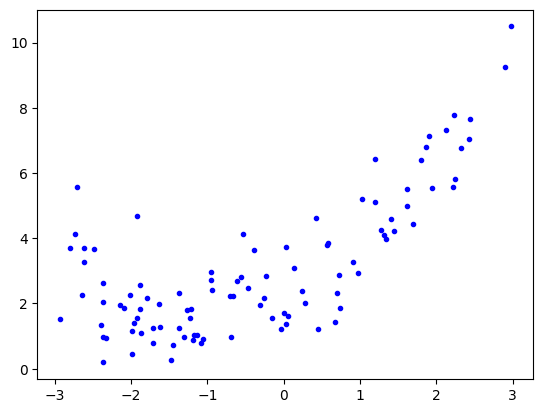

In [29]:
plt.plot(X, y, "b.")

Clearly, a straight line will never fit this data properly. So let’s use Scikit-Learn’s PolynomialFeatures class to transform our training data, adding the square (2nd-degree polynomial) of each feature in the training set as new features (in this case there is just one feature):

In [32]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([-2.73866191])

In [33]:
X_poly[0] #X_poly now contains the original feature of X plus the square of this feature

array([-2.73866191,  7.50026903])

In [35]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_ , lin_reg.coef_

(array([2.26570108]), array([[1.08569284, 0.46185007]]))

In [51]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train , y_val = train_test_split(X, y, test_size=0.2)
    train_errors , val_errors = [], []
    for m in range(1,len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_tarin_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val[:m])
        train_errors.append(mean_squared_error(y_train[:m], y_tarin_predict))
        val_errors.append(mean_squared_error(y_val[:m], y_val_predict))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="Train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="Value")
    plt.legend(loc="lower right")

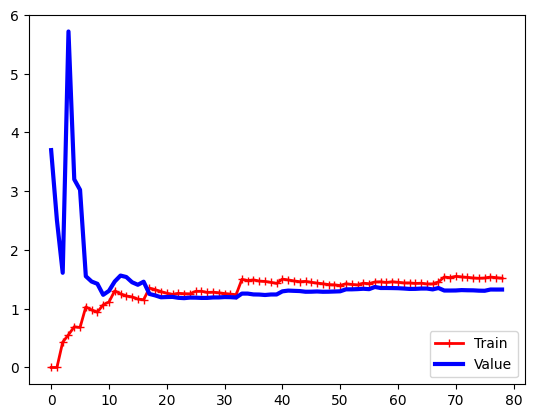

In [52]:
plot_learning_curves(lin_reg, X, y)

When the model is trained on very few training instances, it is incapable of generalizing properly, which
is why the validation error is initially quite big. Then as the model is shown more training examples, it learns and thus the validation error slowly goes down. However, once again a straight line cannot do a good job modeling the data, so the error ends up at a plateau, very close to the other curve.

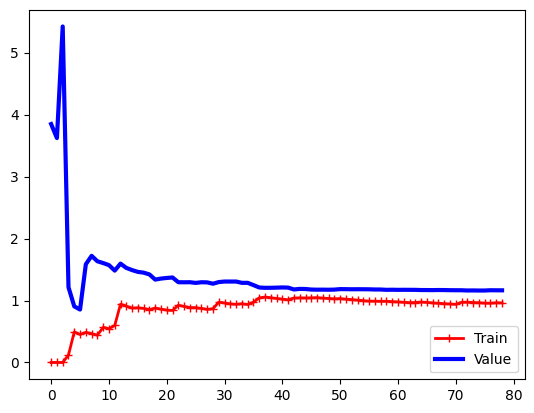

In [53]:
plot_learning_curves(lin_reg, X_poly, y)

Now let’s look at the learning curves of a 10th-degree polynomial model on the same data.

In [76]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("lin_reg", LinearRegression())
])

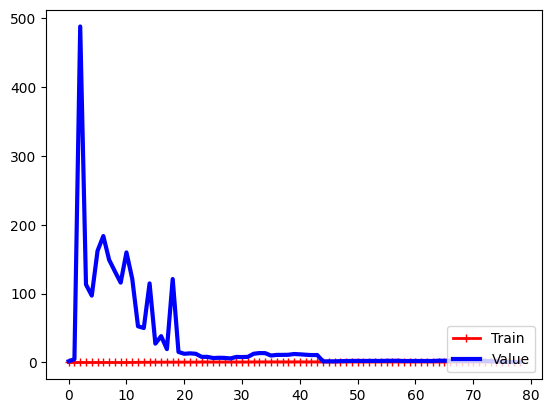

In [80]:
plot_learning_curves(polynomial_regression, X, y)

The error on the training data is much lower than with the Linear Regression model.